# **Task #2 : Prediction using Unsupervised ML**
### **Predict the optimum number of clusters in Iris dataset and represent it visually.**

## **Step 1 : Import all the libraries**

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

## **Step 2 : Import the dataset**

In [146]:
#Load & Read the iris dataset 
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [147]:
#Here we print all the information of iris dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [148]:
#Lets describe the species of our dataset
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **Step 3 : Data Visualization**

**Here is how data is displayed in a 2 dimensional space:**

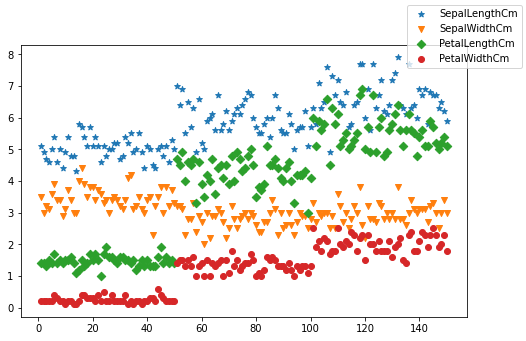

In [149]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x = df.Id, y = df.SepalLengthCm, marker = "*")
plt.scatter(x = df.Id, y = df.SepalWidthCm, marker = "v")
plt.scatter(x = df.Id, y = df.PetalLengthCm, marker = "D")
plt.scatter(x = df.Id, y = df.PetalWidthCm, marker = "o")

fig.legend(labels=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

## **Step 4 : Finding the optimum number of clusters**

In [150]:
# Calculating the within-cluster sum of square
df = pd.DataFrame(df)
iris_df = df.drop(columns= ['Species' ,'Id'] )
within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    # inertia method returns wcss for that model
    within_cluster_sum_of_square.append(km.inertia_)

**Using Elbow graph to find optimum no. of Clusters**

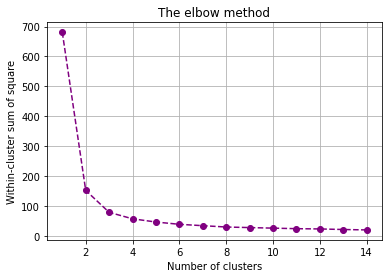

In [151]:
# Plotting the "within-cluster sum of square" 
plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='purple')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

## **Step 5 - Creating the K-Means classifier**

In [152]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### **Visualization of Iris flower dataset with optimum 3 clusters**

**Visualization Sepal length V/S Petal length**

,Color,Iris species
0,purple,setosa
1,green,versicolor
2,yellow,virginica


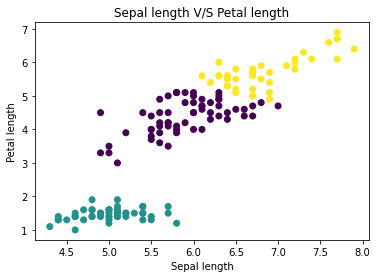

In [160]:
plt.scatter(x[:, 0], x[:, 2], c=y_kmeans)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Sepal length V/S Petal length')

pd.DataFrame({'Color':['purple', 'green', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

**Visualizing Petal Width V/S Sepal Width**

,Color,Iris species
0,purple,setosa
1,green,versicolor
2,yellow,virginica


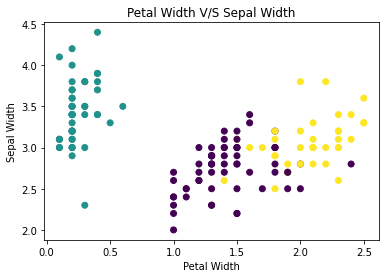

In [159]:
plt.scatter(x[:, 3], x[:, 1], c=y_kmeans)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Petal Width V/S Sepal Width')

pd.DataFrame({'Color':['purple', 'green', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

## **Step 6 - Visualising the clusters**

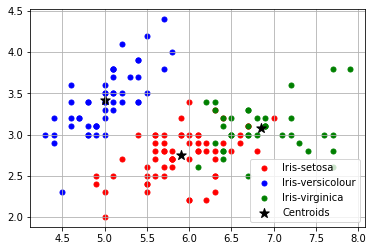

In [156]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black',marker='*', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

### **Hence ,  we visualize the clusters in our Iris dataset**
## ***Task #2 Completed :)***